In [1]:
using Luxor, LightXML

In [2]:
pointradius = 6
linewidth = 2;

In [3]:
function textlabel!(parent, txt::AbstractString, pos::Point; xoffset::Number=0, yoffset::Number=0)
    x = pos.x + xoffset
    y = pos.y + yoffset
    elem = new_child(parent, "text")
    add_text(elem, txt)
    set_attributes(elem, Dict("class"=>"math", "x"=>string(x, "pt"), "y"=>string(y, "pt")))
    return nothing
end;

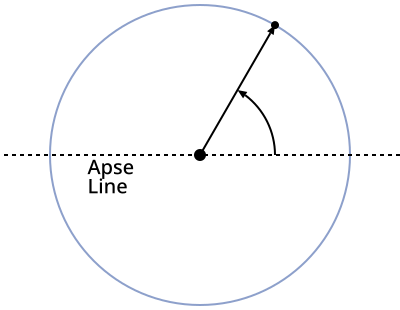

In [5]:
function circleorbit()
    drawing_height = 310
    drawing_width = 400
    Drawing(drawing_width, drawing_height, :svg)
#     box(O, Point(drawing_width, drawing_height), :stroke)
    bbox = BoundingBox(;centered=false)

    origin()
    circle(O, pointradius, :fill)
    orbitradius = 3/8*drawing_width
    @layer begin
        setcolor(141/255, 160/255, 203/255, 1.0)
        circle(O, orbitradius, :stroke)
    end
    m2 = polar(orbitradius, -pi/3)
    circle(m2, 2/3*pointradius, :fill)
    arrow(O, m2, linewidth=linewidth)
    arrow(O, orbitradius/2, 0, -pi/3, clockwise=false, linewidth=linewidth)

    setdash("dash")
    rule(O)

    fontface("Dejavu Sans")
    fontsize(20)
    textwrap("Apse Line", 100, Point(-3orbitradius/4, 0))
    finish()
    svgout = svgstring()
    xdoc = parse_string(svgout)
    xroot = root(xdoc)
    textlabel!(xroot, "\\boldsymbol{r}", between(O, m2, 0.4), xoffset=135, yoffset=125)
    textlabel!(xroot, "m_1", O, xoffset=145, yoffset=125)
    textlabel!(xroot, "m_2", m2, xoffset=133, yoffset=137)
    textlabel!(xroot, "\\nu", between(O, m2, 0.85), xoffset=145, yoffset=195)
    save_file(xdoc, "../raw_svg/periapsis-and-apoapsis-circle.svg");
end

circleorbit();
preview()

In [6]:
function ellipseorbit()
    drawing_height = 350
    drawing_width = 600
    Drawing(drawing_width, drawing_height, :svg)
#     box(O, Point(drawing_width, drawing_height), :stroke)
    bbox = BoundingBox(;centered=false)

    origin()
    @layer begin
        setdash("dash")
        rule(O)
    end

    semimajor = 5/16*drawing_width
    m1 = Point(100, 0)
    circle(m1, pointradius, :fill)
    @layer begin
        setcolor(141/255, 160/255, 203/255, 1.0)
        epoly = ellipse(m1, -m1, 2semimajor, vertices=true)
        poly(epoly, :stroke, close=true)
    end

    pt = polar(semimajor, -pi/3)
    m2 = first(intersectlinepoly(m1, pt, epoly))

    circle(m2, 2/3*pointradius, :fill)
    angle = slope(m1, m2)
    arrow(m1, m2, linewidth=linewidth)
    arrow(m1, semimajor/5, 0, angle, clockwise=false, linewidth=linewidth)

    @layer begin
        setcolor("gray80")
        circle(-m1, pointradius, :fill)
    end

    fontface("Dejavu Sans")
    fontsize(20)
    textwrap("Apse Line", 100, O)
    textwrap("Unoccupied focus", 100, Point(-m1.x, m1.y - 70))
    @layer begin
        setcolor(252/255, 141/255, 98/255, 1.0)
        circle(semimajor, 0, pointradius/2, :fill)
        circle(-semimajor, 0, pointradius/2, :fill)
    end
    label("periapsis", :SE, Point(semimajor, 0))
    label("apoapsis", :NW, Point(-semimajor, 0))
    finish()
    svgout = svgstring()
    xdoc = parse_string(svgout)
    xroot = root(xdoc)
    textlabel!(xroot, "\\boldsymbol{r}", between(m1, m2, 0.4), xoffset=190, yoffset=125)
    textlabel!(xroot, "m_1", m1, xoffset=180, yoffset=140)
    textlabel!(xroot, "m_2", m2, xoffset=190, yoffset=150)
    textlabel!(xroot, "\\nu", between(m1, m2, 0.85), xoffset=225, yoffset=220)
    save_file(xdoc, "../raw_svg/periapsis-and-apoapsis-ellipse.svg");
end

ellipseorbit();

In [7]:
function parabolicorbit()
    drawing_height = 350
    drawing_width = 350
    Drawing(drawing_width, drawing_height, :svg)
#     box(O, Point(drawing_width, drawing_height), :stroke)
    bbox = BoundingBox(;centered=false)

    origin()
    @layer begin
        setdash("dash")
        rule(O)
    end

    semilatus = 3/8*drawing_height
    @layer begin
        m1 = Point(-10.0, 0.0)
        circle(m1, pointradius, :fill)
    end
    p1 = Point(m1.x, m1.y + semilatus)
    p2 = Point(m1.x, m1.y - semilatus)
    p3 = Point(m1.x + semilatus/2, m1.y)

    b = [p1.x; p2.x; p3.x]
    A = [p1.y^2 p1.y 1.0; p2.y^2 p2.y 1.0; p3.y^2 p3.y 1.0]
    p = A \ b
    newx = m1.x - 40
    end1 = Point(newx, (-p[2] + sqrt(p[2]^2 - 4*p[1]*(p[3] - newx)))/(2*p[1]))
    end2 = Point(newx, (-p[2] - sqrt(p[2]^2 - 4*p[1]*(p[3] - newx)))/(2*p[1]))
    C = Point((end2.y - end1.y)/2*(2*p[1]*end1.y - p[2]) + end1.x, (end1.y + end2.y)/2)
    C1 = end1/3 + 2C/3
    C2 = end2/3 + 2C/3
    @layer begin
        newpath()
        setcolor(141/255, 160/255, 203/255, 1.0)
        move(end2)
        curve(C2, C1, end1)
        strokepath()
    end

    m2x = m1.x - 10
    m2 = Point(m2x, (-p[2] + sqrt(p[2]^2 - 4*p[1]*(p[3] - m2x)))/(2*p[1]))
    circle(m2, 2/3*pointradius, :fill)

    angle = slope(m1, m2)
    arrow(m1, m2, linewidth=linewidth)
    arrow(m1, semilatus/4, 0, angle, clockwise=false, linewidth=linewidth)

    fontface("Dejavu Sans")
    fontsize(20)
    textwrap("Apse Line", 100, Point(-100, 0))
    @layer begin
        setcolor(252/255, 141/255, 98/255, 1.0)
        circle(p3, pointradius/2, :fill)
    end
    label("periapsis", :SE, p3)
    finish()
    svgout = svgstring()
    xdoc = parse_string(svgout)
    xroot = root(xdoc)
    textlabel!(xroot, "\\boldsymbol{r}", between(m1, m2, 0.4), xoffset=120, yoffset=125)
    textlabel!(xroot, "m_1", m1, xoffset=120, yoffset=140)
    textlabel!(xroot, "m_2", m2, xoffset=135, yoffset=150)
    textlabel!(xroot, "\\nu", between(m1, m2, 0.85), xoffset=160, yoffset=220)
    save_file(xdoc, "../raw_svg/periapsis-and-apoapsis-parabola.svg");
end

parabolicorbit();

In [8]:
function hyperbolicorbit()
    drawing_height = 350
    drawing_width = 450
    Drawing(drawing_width, drawing_height, :svg)
#     box(O + 5, Point(drawing_width, drawing_height) - 5, :stroke)
    box(O + Point(5, 5), Point(drawing_width, drawing_height) - Point(5, 5), :clip)

    origin()
    @layer begin
        setdash("dash")
        rule(O)
    end

    # Hyperbolic functions
    function hyperbola(x, a, b)
        return sqrt(b^2*(x^2/a^2 - 1))
    end
    function dydx(x, a, b)
        return (b^2 * x / a^2) / sqrt(b^2 * x^2 / a^2 - b^2)
    end

    a = 50
    b = 55
    slope = b / a
    beta = atan(b, a)
    e = 1 / cos(beta)
    rp = Point(a*(e - 1), 0)

    # Asymptotes
    @layer begin
        bbox = BoundingBox(;centered=true)
        topleft = bbox[1]
        bottomright = bbox[2]
        x0, y0 = topleft.x, topleft.y
        x1, y1 = bottomright.x, bottomright.y
        setdash("dash")
        sethue(102/255, 194/255, 165/255)
        setline(1.0)
        line(Point(x0, slope*x0), Point(x1, slope*x1), :stroke)
        line(Point(x0, -slope*x0), Point(x1, -slope*x1), :stroke)
    end

    periapsis = Point(-a, 0)
    apoapsis = Point(a, 0)

    x = 225
    P0 = Point(x, -hyperbola(x, a, b))
    P1 = Point(x, hyperbola(x, a, b))
    yint = Point(0, hyperbola(x, a, b) - dydx(x, a, b) * x)
    flag, Pr = intersectionlines(O, P0, apoapsis, apoapsis + Point(0, 100))
    flag, Ps = intersectionlines(O, P1, apoapsis, apoapsis - Point(0, 100))
    Pa = P0 + 4(Pr - P0)/3
    Pb = P1 - 4(P1 - Ps)/3
    @layer begin
        newpath()
        setcolor(141/255, 160/255, 203/255, 1.0)
        move(P1)
        curve(Pb, Pa, P0)
        strokepath()
        rotate(pi)
        move(P1)
        curve(Pb, Pa, P0)
        strokepath()
    end

    m1 = periapsis - rp
    circle(m1, pointradius, :fill)
    @layer begin
        sethue("gray80")
        f2 = apoapsis + rp
        circle(f2, pointradius, :fill)
    end
    m2 = Point(-125, -hyperbola(-125, a, b) - 4)
    circle(m2, 2pointradius/3, :fill)
    arrow(m1, m2, linewidth=2)
    arrow(m1, 2a*(e-1)/3, 0, Luxor.slope(m1, m2), clockwise=false, linewidth=2)

    fontface("Dejavu Sans")
    fontsize(18)
    textwrap("Apse Line", 100, Point(-210, -40))
    label("periapsis", :SW, periapsis, offset=10)
    label("apoapsis", :SE, apoapsis, offset=10)
    text("Asymptote", Point(25, -slope*25), angle=-beta, valign=:bottom)
    @layer begin
        setcolor(252/255, 141/255, 98/255, 1.0)
        circle(apoapsis, pointradius/2, :fill)
        circle(periapsis, pointradius/2, :fill)
    end
    fontsize(14)
    textwrap("Unoccupied Focus", 100, f2 + Point(10, -30))
    finish()
    svgout = svgstring()
    xdoc = parse_string(svgout)
    xroot = root(xdoc)
    textlabel!(xroot, "\\boldsymbol{r}", between(m1, m2, 0.4), xoffset=175, yoffset=125)
    textlabel!(xroot, "m_1", m1, xoffset=165, yoffset=120)
    textlabel!(xroot, "m_2", m2, xoffset=185, yoffset=170)
    textlabel!(xroot, "\\nu", between(m1, m2, 0.85), xoffset=235, yoffset=220)
    save_file(xdoc, "../raw_svg/periapsis-and-apoapsis-hyperbola.svg");
end

hyperbolicorbit();